Should not have to run this again since data is saved csv file now

In [ ]:
! git clone https://github.com/kaykizzzle/ML-project-1

Cloning into 'ML-project-1'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 80 (delta 43), reused 9 (delta 5), pack-reused 0
Receiving objects: 100% (80/80), 52.55 MiB | 10.02 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [ ]:
# from get_gss.ipynb, provided code to get just needed variables

output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to

modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3): # for each chunk of the data
    # Create url to the chunk to be processed
    url = 'https://github.com/kaykizzzle/ML-project-1/raw/main/gss_chunk_' + str(1+k) + '.parquet'
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode


**RUN STARTING FROM HERE**

**Project Summary:**
>



>Our groups’ research question is as follows: “How does confidence in a select number of US institutions change with race, age, or gender?” After looking through the General Social Survey’s list of variables, we identified twelve detailing the confidence the public had in particular institutions such as banks/financial institutions, major companies, organized religion, education, the federal government, and the scientific community. We thought it would be interesting to examine this in the context of demographic variables such as age, race, and gender as well as questions that asked for a participant’s opinion on some topic. Essentially, we considered the confidence in an institution based on how a person responded to the above questions types. Each variable was examined using functions such as “value_counts()” and “describe()”. More cleaning was completed, and it was discovered that a large number of NANs existed because of questions that are not on the survey every year (more information in the Data Cleaning section). Responses to those questions were narrowed down using the “year” variable.  


>For visualizations, histograms were created for our variables of interest (note: figure sizes are small for scrolling purposes and can be expanded if necessary). We sorted the twelve institutions based on federal government versus non-government entities. Confidence selection choices were as follows: hardly any, only some, and a great deal. Overall, the median option (“only some” confidence) had the highest number of votes across every institution that we examined. As a second step, we investigated the demographic variables in the same context. Looking at these results, who citizens voted for in the 2020 presidential election (Biden vs Trump) and their confidence in institutions had the most surprising trends. Therefore, we examined their vote choice and confidence in all institutions listed. Responses to this question includes survey answers from 2020 and onward since prior participants did not have an opportunity to answer the question. Participants who voted for Biden tended to select the moderate option choice when determining their confidence in an institution. In general, a majority of respondents voted for Biden, but those who voted for Trump had significantly less confidence in the executive branch and more in the judicial branch.

**Relevant Variables:**

| Variable | Definition |                       
| :---------:| :---------- |  
| year     | year observation was taken |  
| occ10    | occupation of the patient |  
| marital  | participant's marital status |  
| martype  | type of marriage             |  
| age      | age of the participant       |  
| educ     | respondent’s education (numeric variable) |  
| major1   | area or field of study when degree was obtained (highest degree obtained)|  
| sex      | biological sex            |  
| race     | what race the participant considers themselves              |  
| satfin   |  participant’s financial satisfaction (considering themselves and their family)|
| pres20   | who did the respondent vote for in the 2020 election (Biden or Trump)|  
| eqwlth   | should the government reduce income differences (numeric: 1 = the government should reduce income differences; 7 = government should not concern itself with reducing income differences)|        
| tax      | thoughts about income tax (too high, too low, or about right)|  
| relig    | religious preference |
| fepol    | men are better suited emotionally for politics than most women (agree or disagree)|
| owngun   | any guns/revolvers in the house (or garage)|
| helpnot  |  the government should be doing more (to solve problems in our country) or are they doing too much (puts more emphasis on individuals and private businesses); 1 = government should do more; 3 = agree with both; 5 = government does too much|
| sexfreq  | frequency of sexual intercourse over the last 12 months|
| childs   | number of children the participant ever had|
| helpful  | do people try to be helpful or are they looking out for themselves?|
| confinan*  | bank and financial institutions |
| conbus*    | major companies|
| conclerg*  | organized religion|
| coneduc*   | education |
| confed*    | executive branch of the federal government|
| conlabor*  | organized labor|
| conpress*  | press|
| conmedic*  | medicine|
| conjudge*  | U.S. Supreme Court|
| consci*    | scientific community|
| conlegis*  | Congress|
| conarmy*   | military|

(*) These variables measure the respondent's confidence in an institution

**Data Cleaning:**

In [ ]:
# import relevant packages, RUN THIS and code chunks below
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# imports selected gss data from csv file, using colab- use /content/ML-project-1/selected_gss_data.csv
df = pd.read_csv('selected_gss_data.csv',low_memory=False)

# List of variables
var_list = ['year','occ10','marital','martype','age','educ','major1','sex','race','satfin','pres20','eqwlth','tax','relig','confinan','conbus','conclerg','coneduc','confed','conlabor','conpress','conmedic','conjudge','consci','conlegis','conarmy','conpharvac','fepol','owngun','helpnot','hlthdep','hlthconf','sexfreq','childs','helpful']

In [ ]:
df.shape

(72392, 35)

In [ ]:
df.describe()

,year,occ10,marital,martype,age,educ,major1,sex,race,satfin,...,conarmy,conpharvac,fepol,owngun,helpnot,hlthdep,hlthconf,sexfreq,childs,helpful
count,72392,67254,72341,5076,71623,72129,7227,72280,72285,67724,...,47804,1164,35699,45865,36777,1129,1134,34521,72131,42221
unique,35,534,6,4,73,22,82,3,4,4,...,4,4,3,4,6,6,6,8,10,4
top,2006,secretaries and administrative assistants,married,marriage between a man and a woman,30.0,12.0,business administration,female,white,more or less satisfied,...,only some,a great deal,disagree,no,3.0,never,never,not at all,0.0,try to be helpful
freq,4510,2727,37590,4999,1571,21401,1072,40301,57657,29987,...,22099,541,25715,27551,14779,386,556,7977,19927,20466


In [ ]:
# remove 2 instances of 'varname' from varname from every variable
for var in var_list:
    string = str(var)
    df[string] = df[string].replace(string,np.nan)

df['owngun'] = df['owngun'].replace('refused_(3)', 'refused') # rename confusing variable name

> The data are actually pretty clean besides the 2 weird instances of the var name in most of the variables. While not shown here for space/repition reasons, every variable was looked at with 'value_counts()' and 'describe()'. Additional cleaning is more dependent on what questions are asked and what variables are analyzed. There are a large number of NANs because some of the questions are not asked every year. The confidence questions (our main analysis variables) generally have 40-50k responses (except 'conpharvac'), so it is likely we will only look at the observations that have responses for those questions by narrowing the data with the 'year' variable.

In [ ]:
# creating data subset of years that have responses to confidence questions (1973-1984 && 1986-2022)
start_year_index1 = df[df.year == '1973'].index[0]
end_year_index1 = df[df.year == '1985'].index[0]
start_year_index2 = df[df.year == '1986'].index[0]

df_subset1 = df.iloc[int(start_year_index1):int(end_year_index1)] # first data subset from 1973-1984
df_subset2 = df.iloc[int(start_year_index2):-1] # second data subset from 1986-2022
df_subset = pd.concat([df_subset1,df_subset2]) # merges both subsets into complete dataset with years where confidence questions were asked

pd.set_option('display.max_columns', None) # makes sure all columns are displayed

In [ ]:
# remove 'conpharvac', 'hlthdep', and 'hlthconf' due to low observation count
# leaving 'pres20' in because it is data from just 1 year so it will be low, plus could be interesting to analyze
df_subset = df_subset.drop(['conpharvac','hlthdep','hlthconf'],axis=1)

print(df_subset.shape)
df_subset.describe()

(69244, 32)


,year,occ10,marital,martype,age,educ,major1,sex,race,satfin,pres20,eqwlth,tax,relig,confinan,conbus,conclerg,coneduc,confed,conlabor,conpress,conmedic,conjudge,consci,conlegis,conarmy,fepol,owngun,helpnot,sexfreq,childs,helpful
count,69242,64558,69191,5073,68485,68984,7224,69130,69135,64588,2395,38757,38764,68815,45238,47257,47380,48399,47726,46402,48082,48500,47165,45751,47697,47801,34230,44333,36774,34518,68993,40629
unique,32,533,5,3,72,21,81,2,3,3,4,7,4,13,3,3,3,3,3,3,3,3,3,3,3,3,2,3,5,7,9,3
top,2006,secretaries and administrative assistants,married,marriage between a man and a woman,32.0,12.0,business administration,female,white,more or less satisfied,biden,1.0,too high,protestant,only some,only some,only some,only some,only some,only some,only some,only some,only some,only some,only some,only some,disagree,no,3.0,not at all,0.0,try to be helpful
freq,4510,2581,35558,4998,1492,20383,1072,38649,54970,28596,1416,8386,23628,38139,25436,29006,24225,27229,23869,26277,24600,22308,24735,22537,25873,22099,24814,26709,14778,7977,19124,19716


In [ ]:
# typecast year from strings to int
df_subset['year'] = pd.to_numeric(df_subset['year'], errors = 'coerce')

In [ ]:
# ordered each confidence variable
df_con_var = ['confinan','conbus','conclerg','coneduc','confed','conlabor','conpress','conmedic','conjudge','consci','conlegis','conarmy']
for con_var in df_con_var:
  df[con_var] = pd.Categorical(df[con_var],['a great deal', 'only some', 'hardly any'])

**Data Exploration:**

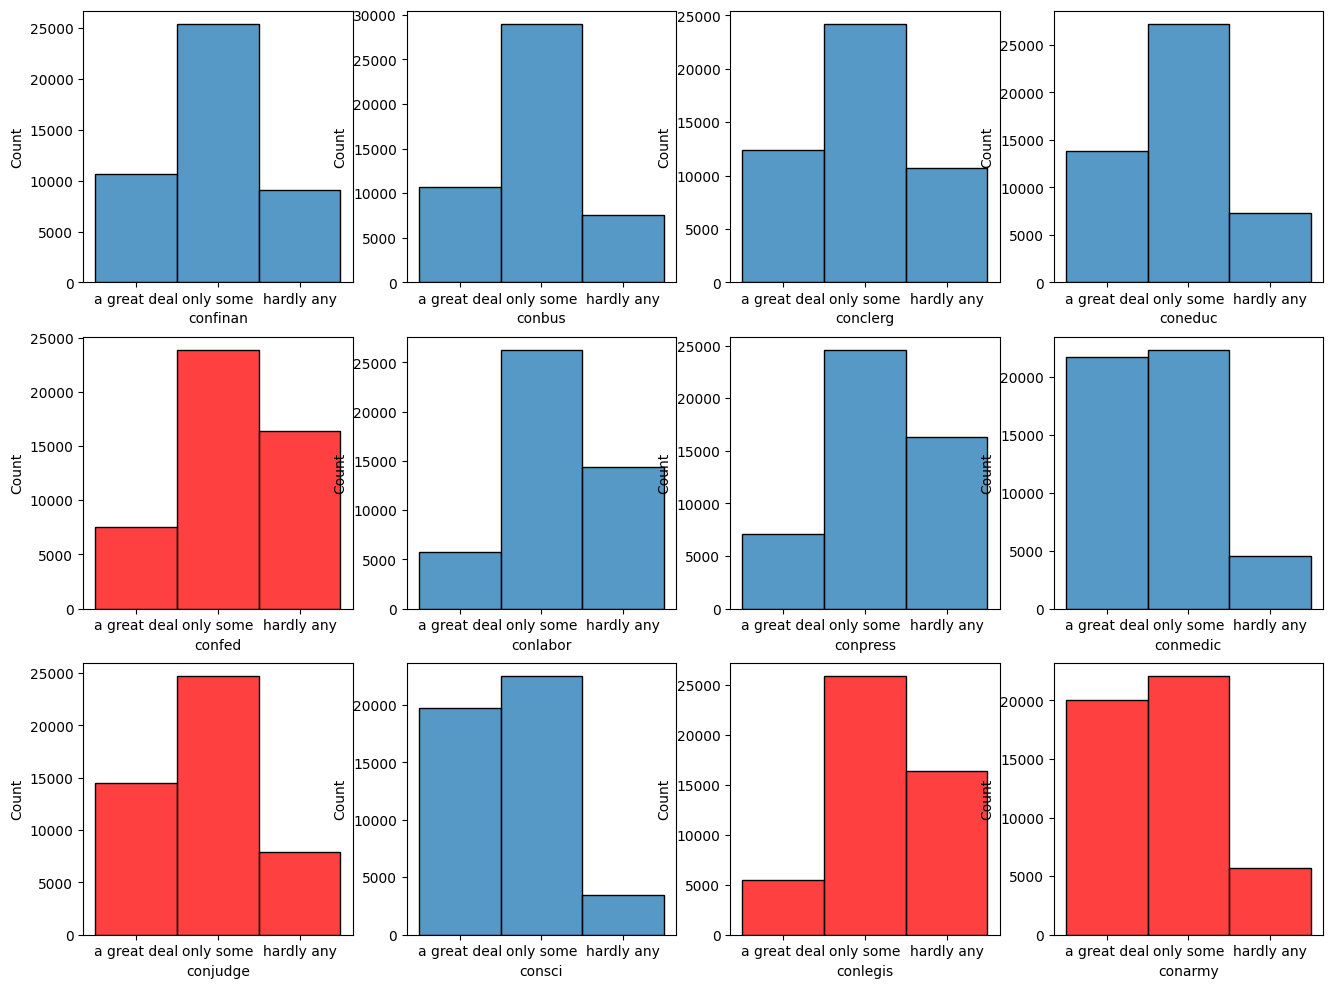

In [ ]:
# Histograms, confidence variables. Federal government institutions in red, non-government in blue.
# Note, the label indicating the confidence variable for each plot can be found below the plot.
fig, axs = plt.subplots(3, 4, figsize=(16,12))

sns.histplot(data=df, x='confinan', ax=axs[0, 0])
sns.histplot(data=df, x='conbus', ax=axs[0, 1])
sns.histplot(data=df, x='conclerg', ax=axs[0, 2])
sns.histplot(data=df, x='coneduc', ax=axs[0, 3])
sns.histplot(data=df, x='confed', color='red', ax=axs[1, 0])
sns.histplot(data=df, x='conlabor', ax=axs[1, 1])
sns.histplot(data=df, x='conpress', ax=axs[1, 2])
sns.histplot(data=df, x='conmedic',ax=axs[1, 3])
sns.histplot(data=df, x='conjudge', color='red', ax=axs[2, 0])
sns.histplot(data=df, x='consci', ax=axs[2, 1])
sns.histplot(data=df, x='conlegis', color='red', ax=axs[2, 2])
sns.histplot(data=df, x='conarmy', color='red', ax=axs[2, 3])

plt.show()

Across every single institution, the predominant confidance selection was "only some". For half of the governmental institutions (particularly legis and fed) the second highest confidence selection was "hardly any"; while judge and army display a greater selection of "a great deal" than "hardly any". In great contrast, 6 non-governmental istitutions (sci, medic, bus, clerg, educ, finan) display greater numbers of "a great deal" of confidence than "hardly any" confidence. The remaining non-governmental institutions, labor and press, have greater numbers for "hardly any" confidence than for "a great deal" of confidence.

While concrete conclusions can't be drawn solely off these observations, some hypotheses can be made. Specifically, it seems that people generally criticize governmental insititutions more-so than non-governmental institutions, maybe because these are institutions backed by more national funding and, thus, should showcase this in their quality of work. Across the board, institutions that deal with representing the public voice (such as legis, press, labor, and fed) showcase much less confidence from the people than institutions that provide humanitarian services (such as medic, educ, sci, and army). This trend could showcase how public needs and wants aren't accurately being addressed nor met by the institutions who claim to do so, regardless of the institution being governmental or not.

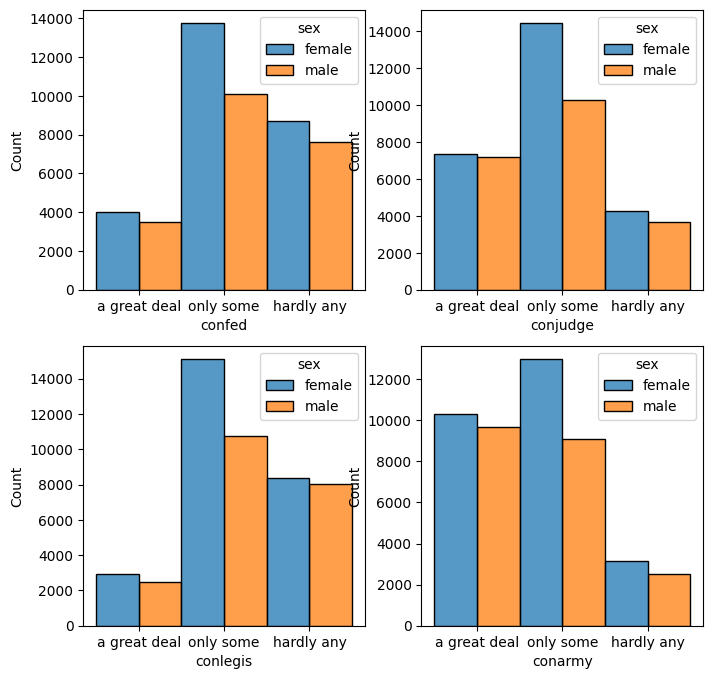

In [ ]:
# The confidence in federal government seems the most interesting, here compared to biological sex.

fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.histplot(data=df, x='confed', hue='sex', multiple='dodge', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='sex', multiple='dodge', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='sex', multiple='dodge', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='sex', multiple='dodge', ax=axs[1, 1])

plt.show()

Across every single gov. institution, women display higher counts in each confidence category. This could imply that women are "more opinionated" than men, but more likely than not, more women were surveyed than men; making these graphs, in terms of analyzing counts, not the most efficient. However, there's still a general trend to be observed: men and women have very similar ratios between each confidence qualifier across all gov. institutions! This could demonstrate how gender doesn't significantly impact public opinion on the above governmental institutions.

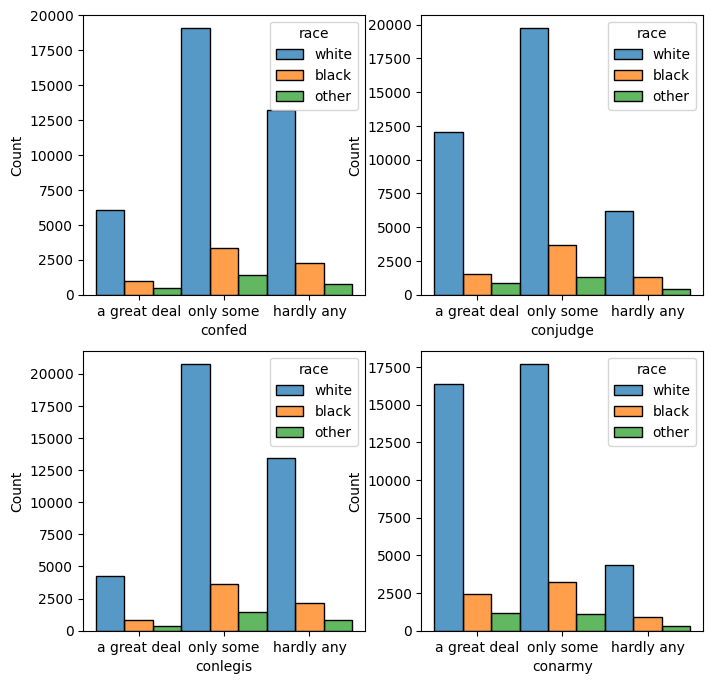

In [ ]:
# Compared to race.

fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.histplot(data=df, x='confed', hue='race', multiple='dodge', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='race', multiple='dodge', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='race', multiple='dodge', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='race', multiple='dodge', ax=axs[1, 1])

plt.show()

As

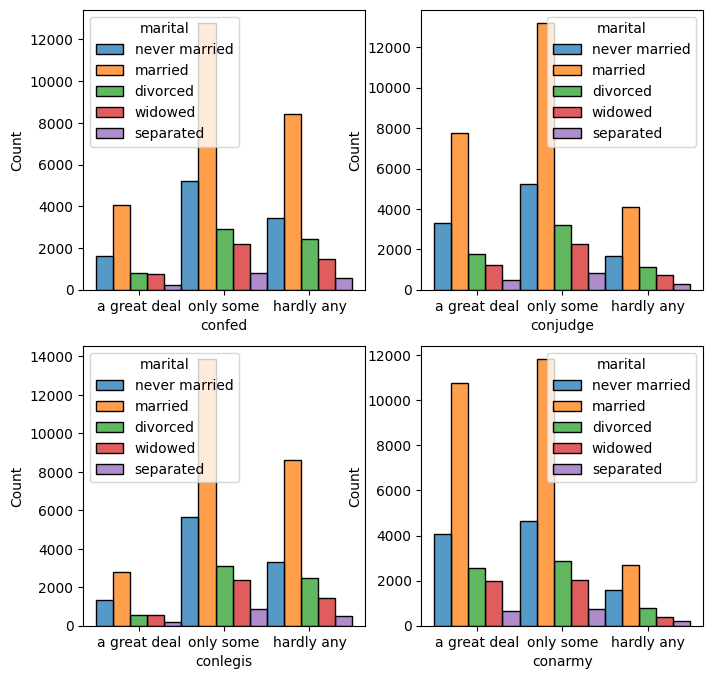

In [ ]:
# Compared to marital status.

fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.histplot(data=df, x='confed', hue='marital', multiple='dodge', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='marital', multiple='dodge', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='marital', multiple='dodge', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='marital', multiple='dodge', ax=axs[1, 1])

plt.show()

First examining the data, it appeared that the non-government institutions had similar distributions of confidence, with many having some confidence and the others not showing distinct trends. However, confidence in government institutions often showed a divide between a great deal and hardly any, particularly executive and legislative branches. This was further explored in demographic variables biological sex, race, and marital status. A small majority of respondents in each category are female, a vast majority of respondents are white, and the majority are married. To yield more interesting results, more personal information and opinions will be explored. Note that variables with too many groups, such as age, were not included.

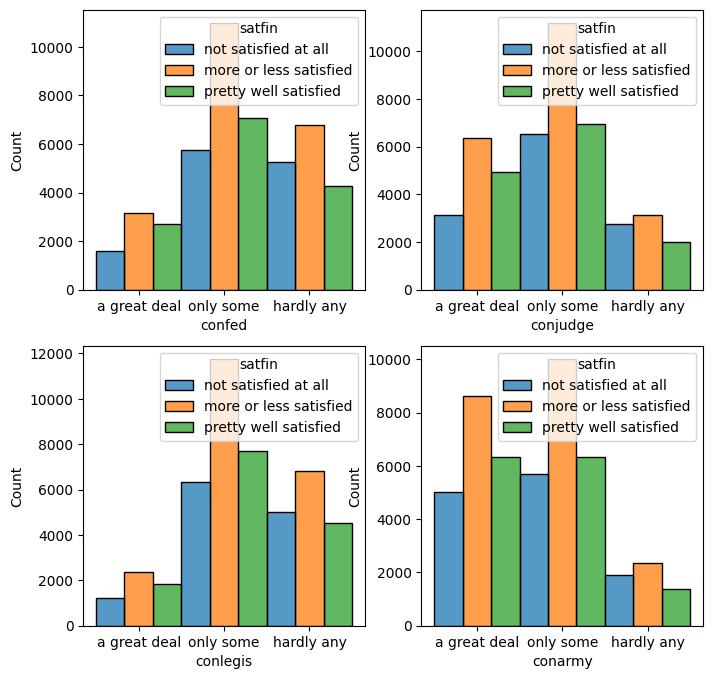

In [ ]:
# Compared to financial satisfaction.

fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.histplot(data=df, x='confed', hue='satfin', multiple='dodge', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='satfin', multiple='dodge', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='satfin', multiple='dodge', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='satfin', multiple='dodge', ax=axs[1, 1])

plt.show()

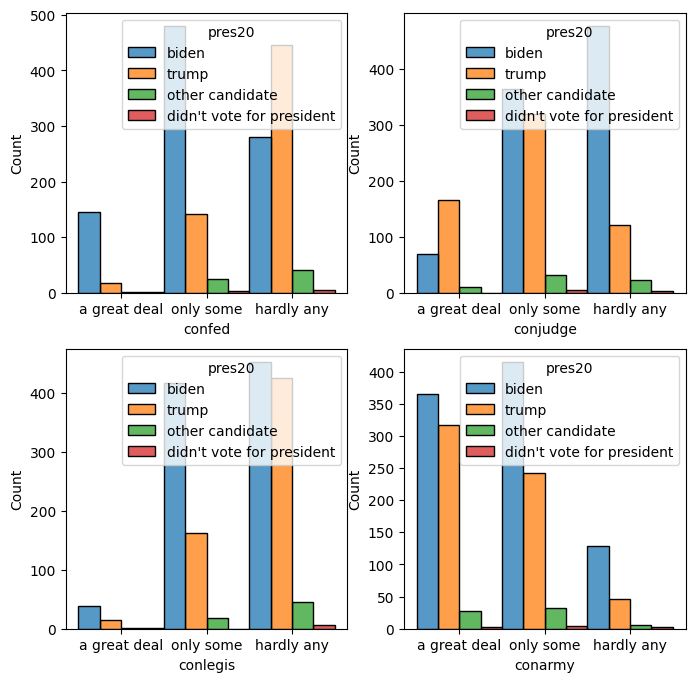

In [ ]:
# Compared to 2020 presidential election vote (most interesting by far!)

fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.histplot(data=df, x='confed', hue='pres20', multiple='dodge', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='pres20', multiple='dodge', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='pres20', multiple='dodge', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='pres20', multiple='dodge', ax=axs[1, 1])

plt.show()

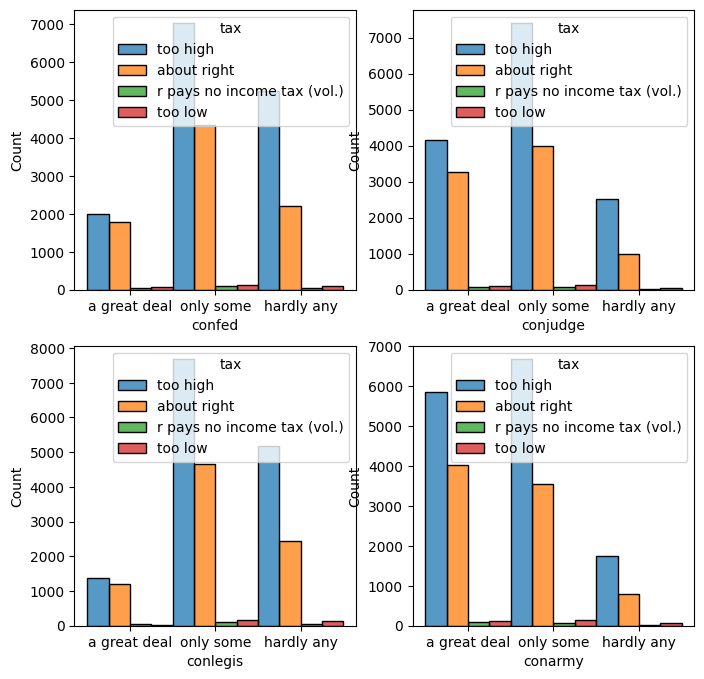

In [ ]:
# Compared to thoughts about income tax.

fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.histplot(data=df, x='confed', hue='tax', multiple='dodge', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='tax', multiple='dodge', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='tax', multiple='dodge', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='tax', multiple='dodge', ax=axs[1, 1])

plt.show()

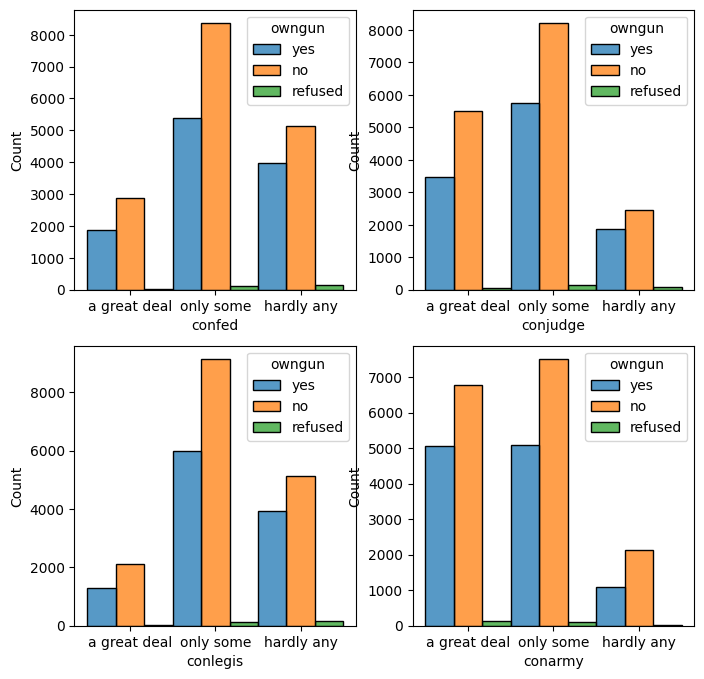

In [ ]:
# Compared to gun ownership.

fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.histplot(data=df, x='confed', hue='owngun', multiple='dodge', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='owngun', multiple='dodge', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='owngun', multiple='dodge', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='owngun', multiple='dodge', ax=axs[1, 1])

plt.show()

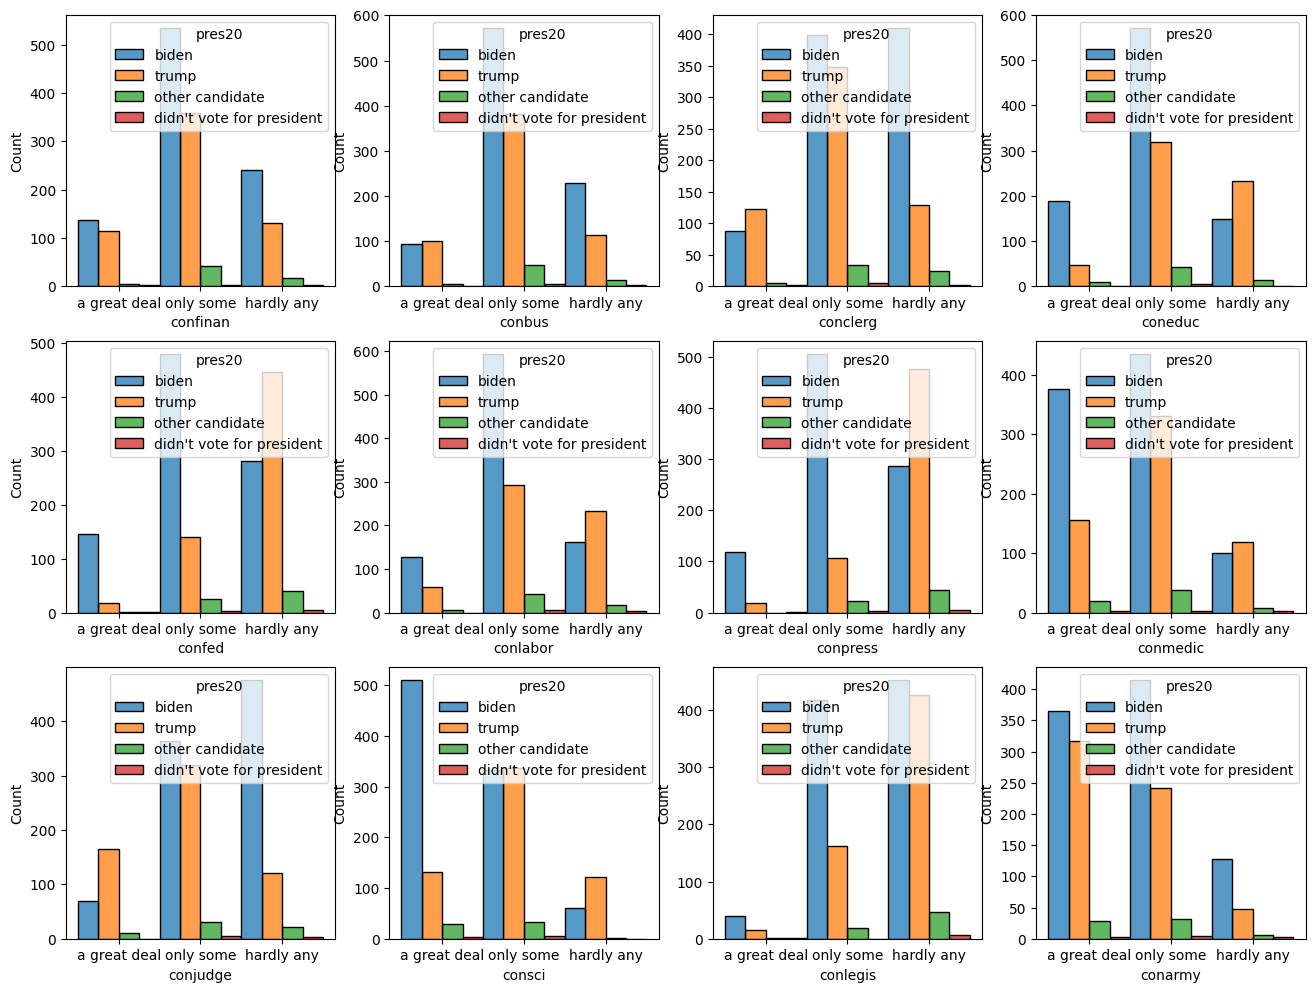

In [ ]:
# 2020 presidential election vote choice vs confidence in all institutions.
fig, axs = plt.subplots(3, 4, figsize=(16,12))

sns.histplot(data=df, x='confinan', hue='pres20', multiple='dodge', ax=axs[0, 0])
sns.histplot(data=df, x='conbus', hue='pres20', multiple='dodge', ax=axs[0, 1])
sns.histplot(data=df, x='conclerg', hue='pres20', multiple='dodge', ax=axs[0, 2])
sns.histplot(data=df, x='coneduc', hue='pres20', multiple='dodge', ax=axs[0, 3])
sns.histplot(data=df, x='confed', hue='pres20', multiple='dodge', ax=axs[1, 0])
sns.histplot(data=df, x='conlabor', hue='pres20', multiple='dodge', ax=axs[1, 1])
sns.histplot(data=df, x='conpress', hue='pres20', multiple='dodge', ax=axs[1, 2])
sns.histplot(data=df, x='conmedic', hue='pres20', multiple='dodge', ax=axs[1, 3])
sns.histplot(data=df, x='conjudge', hue='pres20', multiple='dodge', ax=axs[2, 0])
sns.histplot(data=df, x='consci', hue='pres20', multiple='dodge', ax=axs[2, 1])
sns.histplot(data=df, x='conlegis', hue='pres20', multiple='dodge', ax=axs[2, 2])
sns.histplot(data=df, x='conarmy', hue='pres20', multiple='dodge', ax=axs[2, 3])

plt.show()

Opinion questions such as financial satisfaction and thoughts about income tax followed the same pattern across institutional confidence. Suprisingly, gun ownership also did not show noticeable variation between groups, yet this is considered a more controversial issue in today's politics. Pres20 (which candidate the respondent voted for in the 2020 election) showed most respondents voted for Biden, but those who voted for Trump had significantly less confidence in the executive branch and more confidence in the judicial branch. Grouping by this survey category also narrows the survey answers to 2020 onward, since prior respondents did not vote and did not have an opportunity to answer the question.

**Data Analysis:**

In [ ]:
# purpose of this code chunk is to create % confidence data over the years per each variable

# gets years and relevant variables and creates a new dataframe to hold the data
years = df_subset['year'].unique()
years = years[~np.isnan(years)]
var_list = ['confinan','conbus','conclerg','coneduc','confed','conlabor','conpress','conmedic','conjudge','consci','conlegis','conarmy']
df_year = pd.DataFrame()
df_year['year'] = years

# nested loops fill new dataframe with confidence of each variable each year
for var in var_list:
    year_data = np.empty((years.shape[0],1)) #initializes empty array
    k = 0

    for n in years:
        df_temp = df_subset[df_subset['year'] == n] # gets data corresponding to year n
        n_observations = df_temp.shape[0]  # gets the number of observations of that year (basically value_counts)
        df_temp = df_temp[df_temp[var] == 'a great deal'] # gets data corresponding to high confidence for this variable in year n
        n_confidence = df_temp.shape[0] # gets number of observations with high confidence
        confidence = (n_confidence / n_observations) * 100 # converts to percentage
        year_data[k] = confidence # adds year data to array
        k = k+1

    df_year[var] = year_data # adds array data for one variable to the dataframe

df_year.head()

,year,confinan,conbus,conclerg,coneduc,confed,conlabor,conpress,conmedic,conjudge,consci,conlegis,conarmy
0,1973.0,0.000000,29.188830,34.574468,36.768617,29.188830,15.425532,23.005319,53.789894,31.316489,36.702128,23.404255,31.582447
1,1974.0,0.000000,31.334232,44.204852,48.989218,13.611860,18.194070,25.808625,60.309973,33.153639,44.946092,17.048518,39.555256
2,1975.0,31.879195,19.194631,24.295302,30.872483,13.288591,10.067114,23.758389,50.402685,30.671141,37.583893,13.288591,35.167785
3,1976.0,39.359573,21.881254,30.486991,37.224817,13.408939,11.541027,28.285524,53.835891,35.223482,42.561708,13.675784,38.959306
4,1977.0,41.830065,27.124183,39.869281,40.522876,27.843137,14.705882,25.032680,51.372549,35.490196,40.784314,19.019608,36.209150


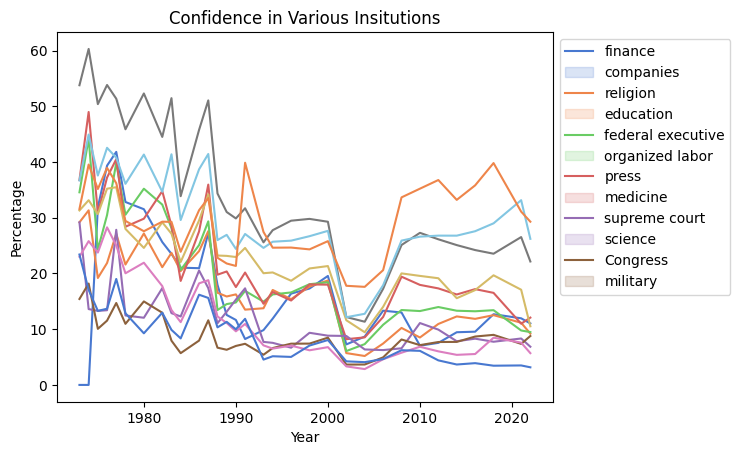

In [ ]:
melted_year = df_year.melt(id_vars='year') # melts data for easier line plotting

# plots data
legend_list = ['finance','companies','religion','education','federal executive','organized labor','press','medicine','supreme court','science','Congress','military']
palette = sns.color_palette('muted',12)
sns.lineplot(data=melted_year,x='year',y='value',hue='variable',palette=palette).set(
    title='Confidence in Various Insitutions',xlabel='Year',ylabel='Percentage')
plt.legend(legend_list,bbox_to_anchor=(1, 1))

Very few institutions managed to increase respondents' confidence over the period of the survey data in question. There isn't much resolution on confidence immediately following the 2020 election, but other historical trends are rather clear. There is a sharp dip in all confidences after 9/11. Financial confidence skyrockets in the 1970s, but declines throughout as economic optimism fades, especially in the late 2000s with the housing crisis. Additionally, confidence is prone to large variation between years, suggesting respondents of the GSS are heavily influenced by events of that year, having less of a long term perspective.

**Conclusion:**

>From the panel of twelve histograms depicting who a person voted for and their confidence in a particular institution, several things stood out. In eleven out of the twelve cases, people who voted for Biden had selected the “only some” confidence choice more than Trump voters. This could indicate Biden voters tend to select moderate option choices more often than the two extremes (“a great deal”, “hardly any”). When it comes to federal institutions, both voter populations leaned towards having a lower amount of confidence in all three branches of the government; however, this trend was flipped for the army. Lastly, when examining the trends in the line plot, a majority of the institutions that we looked at experienced a decline in confidence from when the GSS first began in 1972 to our current time.


> There are some considerations to take into account with our information. Although the GSS strives to incorporate a diverse range of demographics, for our confidence questions, a majority of the respondents were white, and a majority were married. The variables that we examined (excluding the pres20 variable) are used in questions each year, ensuring longitudinal results. However, the data may not accurately capture the broader political or social impacts of a particular time period that could affect the statistics for a certain year. Additionally, since the pres20 variable is newer and only 2-3 thousand people are surveyed each year, a larger sample size might have a different effect on what we are able to see.
